<a href="https://colab.research.google.com/github/gnssl98/MachineLearning_Repo/blob/master/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [5]:
from google.colab import auth
auth.authenticate_user()

In [7]:
from google.colab import drive
drive.mount('/content/g')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/g


In [29]:
!mkdir -p ~/.kaggle
!cp "/content/g/My Drive/2020_Kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [44]:
!chmod 600 ~/.kaggle/kaggle.json

In [34]:
!kaggle -v

Kaggle API 1.5.6


In [35]:
!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
tpu-getting-started                               2030-06-03 23:59:00  Getting Started      Kudos         43           False  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       3399           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      25855           False  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       5806           False  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        574           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       1833   

In [45]:
!kaggle competitions download -c titanic 

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 26.7MB/s]


### Error 발생
(Error)<br>Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.6 / client 1.5.4) 403 - Forbidden<br>
-> 뒤의 403 Forbidden을 인지하고 못하고 버전 문제인줄 알고 접근<br>
(Solution)<br>!pip install --upgrade --force-reinstall --no-deps kaggle<br>
kaggle의 버전이 1.56으로 변경 후 다시 다운로드 시도
<hr>
(Error)<br>403 - Forbidden<br>
-> 권한이 없음을 인지<br>
(Solution)<br>홈페이지에 competition에 참가 후 다운로드 ->해결
<br><br>
(Reference Site) https://www.kaggle.com/c/rsna-intracranial-hemorrhage-detection/discussion/109520

In [36]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674/kaggle-1.5.6-cp36-none-any.whl
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


titanic data가 zip형식으로 압축되어 있어서 리눅스 명령어로 해제 시도<br>


In [46]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## 데이터 로드
Numpy, Pandas, Matpltlib 패키지 import<br>
Pands의 read_csv 모듈을 통해 데이터 로드

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [49]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df_gender = pd.read_csv('./gender_submission.csv')

In [80]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cabbin의 non-null 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


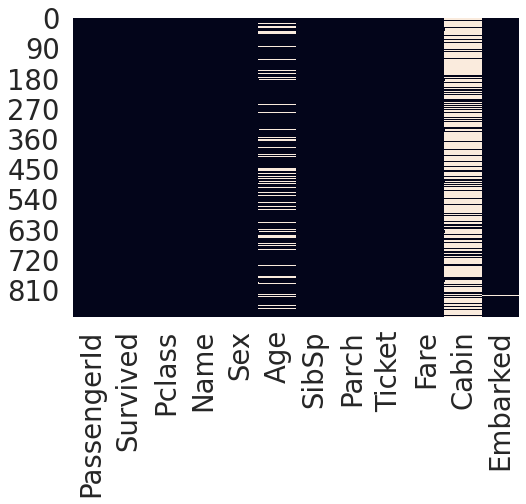

In [85]:
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

sns.heatmap(df_train.isnull(), cbar=False)

In [86]:
df_train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
T              1
A7             1
D11            1
E36            1
B80            1
Name: Cabin, Length: 147, dtype: int64

In [84]:
df_train['Cabin'].count()

204

In [70]:
%matplotlib inline
import seaborn as sns
sns.set()
def bar_chart(feature):
​  survived = df_train[df_train['Survived']==1][feature].value_counts()
  dead = df_train[df_train['Survived']==0][feature].value_counts()
​  df = pd.DataFrame([survived,dead])
​  df.index = ['Survived','Dead']
​  df.plot(kind='bar',stacked=True, figsize=(10,5))

SyntaxError: ignored